In [1]:
import os
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config
import ipywidgets
from encoder.generator_model import Generator
from demo_utils import *
from aei import *
import matplotlib.pyplot as plt

from ipywidgets import FloatSlider
from ipywidgets import interact, interactive, fixed, interact_manual, Layout

import ipywidgets as widgets
%matplotlib inline

URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'

tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

donald_trump = np.load('ffhq_dataset/latent_representations/donald_trump_01.npy')
hillary_clinton = np.load('ffhq_dataset/latent_representations/hillary_clinton_01.npy')

mx = np.load('latent_codes/max-headshot_01.npy')
mx2 = np.load('latent_codes/test_aligned.npy')
ron = np.load('latent_codes/ron-green-2_01.npy')
zz = np.load('latent_codes/zz-1_01.npy')

brad = np.load('latent_codes/brad_pitt_01.npy')
mbj = np.load('latent_codes/celeb2_aligned.npy')
ll = np.load('latent_codes/celeb3_aligned.npy')
celebs = [brad, mbj, ll]

smile_direction = np.load('ffhq_dataset/latent_directions/smile.npy')
gender_direction = np.load('ffhq_dataset/latent_directions/gender.npy')
age_direction = np.load('ffhq_dataset/latent_directions/age.npy')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


File already exists: post_img/test_img_aligned.png
raw_img_path  pre_img/IMG_9427.jpg
aligned_face_path  post_img/test_img_aligned.png
face_landmarks <generator object LandmarksDetector.get_landmarks at 0x7fa168070570>
done aligning
['post_img/test_img_aligned.png']
aligned_img_path  post_img/test_img_aligned.png
imported network
Instructions for updating:
Use tf.cast instead.
begin optimizing


  0%|          | 0/1000 [00:00<?, ?it/s]

Instructions for updating:
Use tf.cast instead.


 loss: 0.87688476


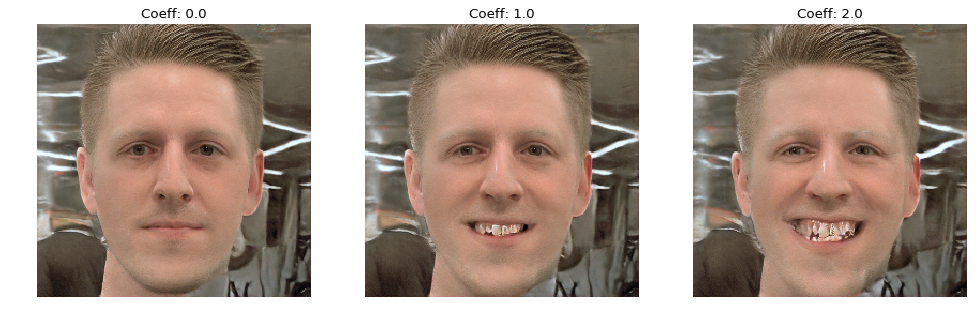

In [3]:
latent_demo = align_and_encode_latest_img('pre_img/', 'post_img/', 'gen_img/', 'latent_codes/', generator, Gs_network, 'test_img')
val = latent_demo
move_and_show(latent_demo, smile_direction, [0, 1, 2], generator)

In [3]:
mic = np.load('latent_codes/mic.npy')
j = np.load('latent_codes/test_img.npy')

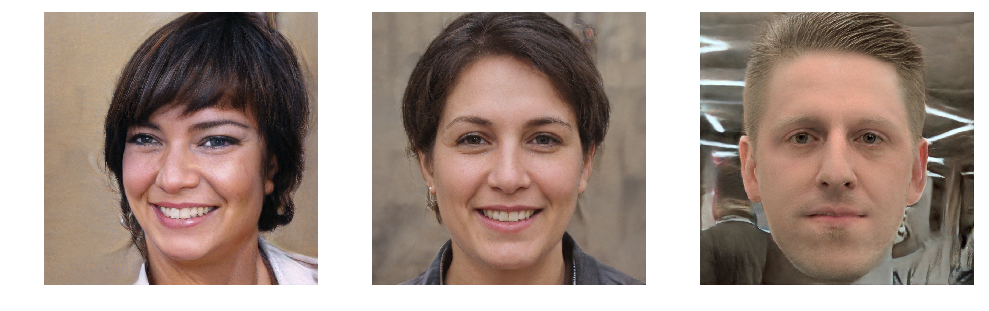

In [4]:
draw_truncation_trick(latent_demo, [-.5, 0,  1], Gs_network)

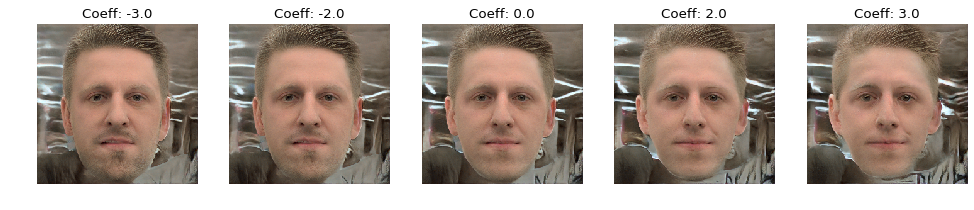

In [5]:
move_and_show(latent_demo, age_direction, [-3, -2, 0, 2, 3], generator)

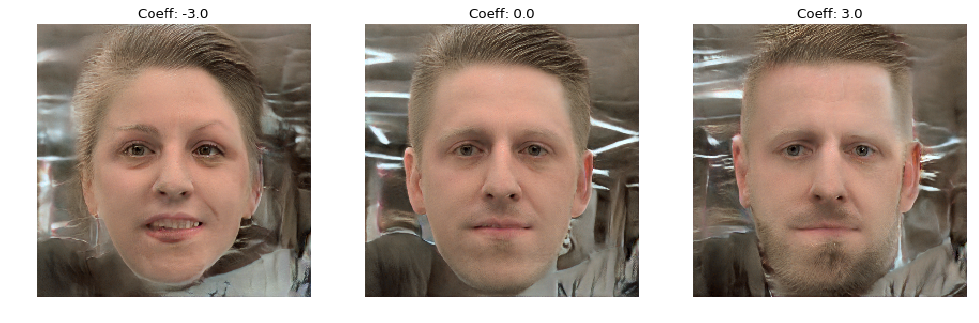

In [6]:
move_and_show(latent_demo, gender_direction, [-3, 0, 3], generator)

In [7]:
save_image(latent_demo, age_direction, [-3, -2, 0, 2, 3], generator)

Images saved to /print_img


In [4]:
# Generate random faces here
style = {'description_width': 'initial'}
interact(draw_random_face, rndState=widgets.BoundedIntText(value=7000, 
    min=0,
    max=2**32 - 1,
    description="Random State:",
    layout=Layout(height='30px',width='256px'),
    style=style,),
    Gs_network=fixed(Gs_network)
    )

interactive(children=(BoundedIntText(value=7000, description='Random State:', layout=Layout(height='30px', wid…

<function demo_utils.draw_random_face(rndState, Gs_network)>

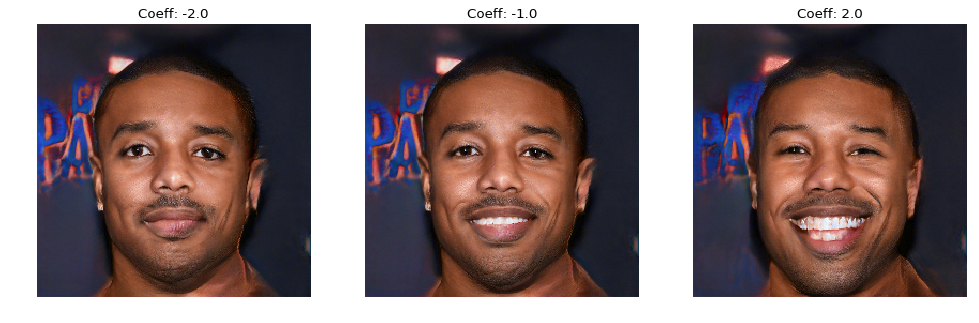

In [5]:
move_and_show(mbj, smile_direction, [-2, -1, 2], generator)

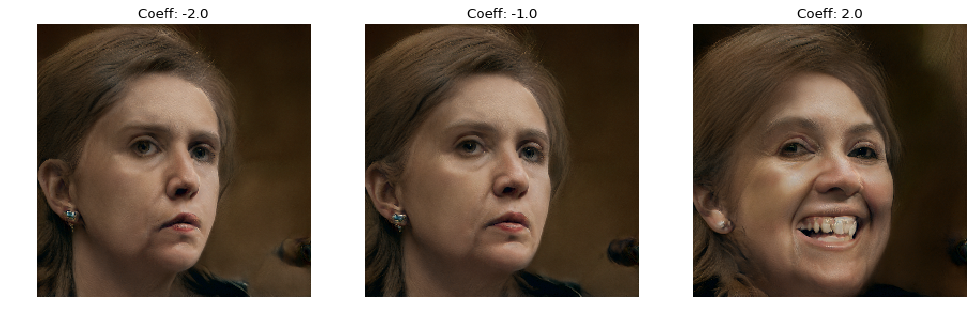

In [9]:
move_and_show(hillary_clinton, smile_direction, [-2, -1, 2], generator)

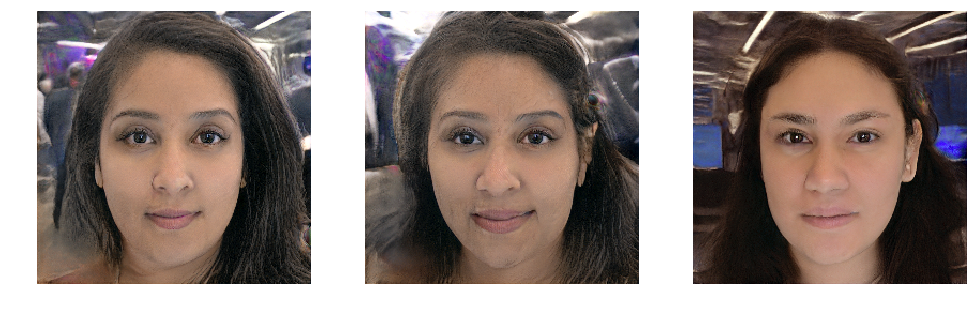

In [8]:
mix_two_styles(bri, val, generator, Gs_network)

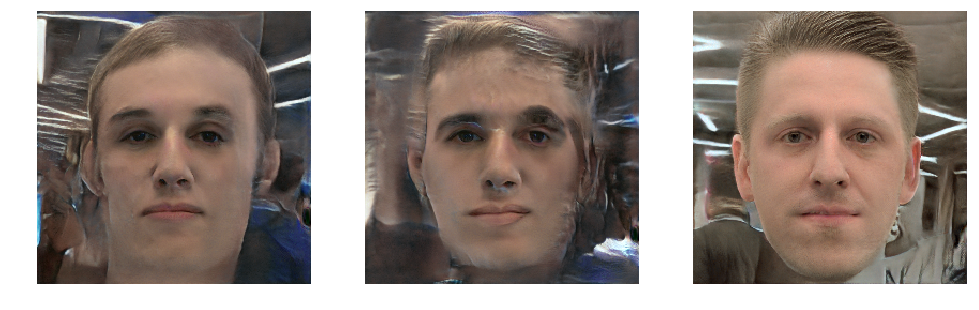

In [7]:
mix_two_styles(mic, j, generator, Gs_network)

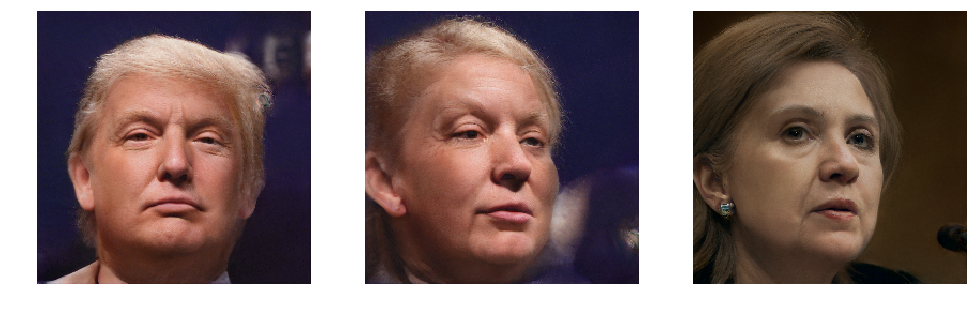

In [10]:
mix_two_styles(donald_trump, hillary_clinton, generator, Gs_network)

In [6]:
interact(move_and_show_interactive, coeff=FloatSlider(min=-.7, max=1, step=.2),generator=fixed(generator), latent_vector=fixed(latent_demo), direction=fixed(smile_direction))

interactive(children=(FloatSlider(value=0.0, description='coeff', max=1.0, min=-0.7, step=0.2), Output()), _do…

<function demo_utils.move_and_show_interactive(generator, latent_vector, direction, coeff)>

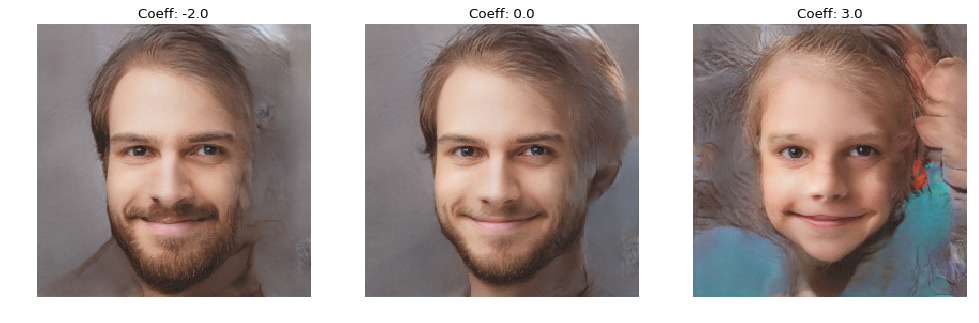

In [9]:
interact(draw_truncation_tri)

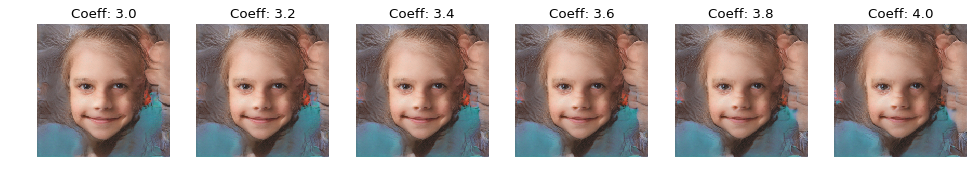

In [7]:
move_and_show(mx, age_direction, [3, 3.2, 3.4, 3.6, 3.8, 4], generator)